In [ ]:
import pandas as pd
import joblib

# Load the original dataset:
original_data = pd.read_csv('/content/Allergen_Status_of_Food_Products.csv')

# Load the preprocessed dataset with encoded values:
encoded_data = pd.read_csv('/content/SafeBite_preprocessed_data.csv')

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
# Load the pre-trained encoder and model:
loaded_encoder = joblib.load('loo_encoder.pkl')
loaded_model = joblib.load('final_dt_model.pkl')
print("Model and encoder loaded successfully!")

Model and encoder loaded successfully!


In [ ]:
# Example data for prediction:
example_data = pd.DataFrame({
    'Food Product': ['Gluten-Free Chocolate Cake', 'Chocolate Cake'],
    'Main Ingredient': ['Almond flour', 'Wheat flour'],
    'Sweetener': ['Coconut sugar', 'Sugar'],
    'Fat/Oil': ['Coconut oil', 'Butter'],
    'Seasoning': ['Vanilla extract, Cocoa', 'Vanilla extract, Cocoa'],
    'Allergens': ['None', 'Wheat-Dairy'],
    'Price ($)': [7.50, 7.55],
    'Customer rating (Out of 5)': [4.5, 4.6]
})

In [ ]:
# Get the feature names from the trained model:
training_features = loaded_model.feature_names_in_
training_features

array(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil',
       'Seasoning', 'Allergens', 'Price ($)',
       'Customer rating (Out of 5)'], dtype=object)

In [ ]:
# Selecting categorical columns for encoding:
categorical_cols = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

In [ ]:
# Transforming the example data using the loaded encoder:
example_data_encoded = loaded_encoder.transform(example_data[categorical_cols])
example_data_encoded

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
0,12.397588,12.397588,12.397588,12.397588,12.397588,12.165608
1,12.397588,16.355000,12.319891,12.444471,12.397588,12.397588


In [ ]:
# Get encoded column names:
encoded_cols = example_data_encoded.columns
encoded_cols

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens'],
      dtype='object')

In [ ]:
# Combine numerical features and encoded features, ensuring the order matches training data:
example_data = pd.concat([example_data[['Price ($)', 'Customer rating (Out of 5)']], example_data_encoded], axis=1)
example_data

,Price ($),Customer rating (Out of 5),Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
0,7.50,4.5,12.397588,12.397588,12.397588,12.397588,12.397588,12.165608
1,7.55,4.6,12.397588,16.355000,12.319891,12.444471,12.397588,12.397588


In [ ]:
# Reorder columns to match the training data:
example_data = example_data[training_features]
example_data

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5)
0,12.397588,12.397588,12.397588,12.397588,12.397588,12.165608,7.50,4.5
1,12.397588,16.355000,12.319891,12.444471,12.397588,12.397588,7.55,4.6


In [ ]:
training_features

array(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil',
       'Seasoning', 'Allergens', 'Price ($)',
       'Customer rating (Out of 5)'], dtype=object)

In [ ]:
# Making predictions using the loaded model:
predictions = loaded_model.predict(example_data)

print("Predictions on example data:", predictions)

Predictions on example data: [1 0]


Feature importances: [0.         0.         0.         0.01552717 0.         0.86840047
 0.10586605 0.01020631]


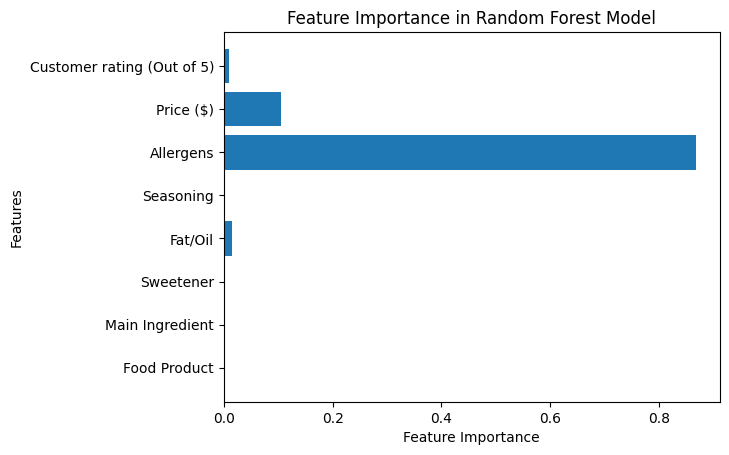

In [ ]:
import matplotlib.pyplot as plt

importances = loaded_model.feature_importances_

print("Feature importances:", importances)

feature_names = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens', 'Price ($)', 'Customer rating (Out of 5)']

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()